<a href="https://colab.research.google.com/github/tracyhnguyen/obesity/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Everything

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn.datasets
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

import statsmodels.api as sm



obesity_file_path = '../content/drive/MyDrive/Summer_Project/Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.csv'

obesity_data = pd.read_csv(obesity_file_path)
obesity_data = obesity_data.drop(['INDICATOR','PANEL','PANEL_NUM','UNIT','UNIT_NUM','SE','FLAG'], axis = 'columns')

* Our target value is the column 'estimate'
* We're trying to find future estimate rates of obesity in gender, age, race, ethnicity, || probably not all but just  anything alarming

---

1. Positive correlation(both values increase/decrease)
2. Negative correlation(differing directions)




### Reading Data


In [ ]:
obesity_data.STUB_LABEL.unique()

array(['2-19 years', 'Male', 'Female',
       'Not Hispanic or Latino: White only',
       'Not Hispanic or Latino: Black or African American only',
       'Not Hispanic or Latino: Asian only',
       'Hispanic or Latino: All races',
       'Hispanic or Latino: Mexican: All races',
       'Male: Not Hispanic or Latino: Black or African America',
       'Male: Not Hispanic or Latino: White only',
       'Male: Not Hispanic or Latino: Asian only',
       'Male: Hispanic or Latino: All races',
       'Male: Hispanic or Latino: Mexican: All races',
       'Female: Not Hispanic or Latino: White only',
       'Female: Not Hispanic or Latino: Asian only',
       'Female: Hispanic or Latino: All races',
       'Female: Hispanic or Latino: Mexican: All races', 'Below 100%',
       '100%-199%', '200%-399%', '400% or more', '2-5 years',
       '6-11 years', '12-19 years'], dtype=object)

In [ ]:
obesity_data.YEAR.unique() #1-10

array(['1988-1994', '1999-2002', '2001-2004', '2003-2006', '2005-2008',
       '2007-2010', '2009-2012', '2011-2014', '2013-2016', '2015-2018'],
      dtype=object)

In [ ]:
obesity_data.STUB_NAME.unique()
# 0:total || 1:sex || 2:Age || 3:Race and Hispanic Origin || 4:Sex and race and Hispanic Origin || 5: Percent of Poverty Level
# stub_label_num is the id of the different combination
# 1.1 MALE ; 1.2 FEMALE

array(['Total', 'Sex', 'Race and Hispanic origin',
       'Sex and race and Hispanic origin', 'Percent of poverty level',
       'Age'], dtype=object)

In [ ]:
#null values for each columns
obesity_data.isnull().sum()

STUB_NAME           0
STUB_NAME_NUM       0
STUB_LABEL_NUM     40
STUB_LABEL          0
YEAR                0
YEAR_NUM            0
AGE                 0
AGE_NUM             0
ESTIMATE          167
dtype: int64

### Data Preprocessing

In [ ]:
gender_data = obesity_data.loc[obesity_data['STUB_NAME_NUM'] == 1]
age_data = obesity_data.loc[obesity_data['STUB_NAME_NUM'] == 2]
race_origin_data = obesity_data.loc[obesity_data['STUB_NAME_NUM'] == 3]
race_origin_sex_data = obesity_data.loc[obesity_data['STUB_NAME_NUM'] == 4]
poverty_data = obesity_data.loc[obesity_data['STUB_NAME_NUM'] == 5]

In [ ]:
obesity_data.YEAR.unique()

array(['1988-1994', '1999-2002', '2001-2004', '2003-2006', '2005-2008',
       '2007-2010', '2009-2012', '2011-2014', '2013-2016', '2015-2018'],
      dtype=object)

## Data Visualization


***DATA VISUALIZATION CHOICES***


* Stacked Bar Chart; (DONE)
> * x = years || y = male/female

* Area Chart (DONE)
> * Using age of 2-19 -- rates of obesity of different ethnicity (5) over the years

* Twin Bar Graph (DONE)
>  *  poverty bracket of latest year and recent year

* Pie chart; ***CANCEL*** -- too many year ranges to summarize
>> * Is for DISTRIBUTION of numeric data

* Heatmap; ***CANCEL*** -- not recommended with current topic and given features
>> * Our data falls toward TRENDS rather than COMPARISON

* Line chart; (Teresa)
> * Multiple lines; obesity rates of ...poverty over the years
> * Single line; obesity rates of children (2-19) over the years

In [ ]:
race_origin_data.STUB_LABEL.unique()
#age, race, gender, poverty, ethnic

array(['Not Hispanic or Latino: White only',
       'Not Hispanic or Latino: Black or African American only',
       'Not Hispanic or Latino: Asian only',
       'Hispanic or Latino: All races',
       'Hispanic or Latino: Mexican: All races'], dtype=object)

###Twin Bar Graph

<ipython-input-14-13fb5580dfb5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = obesity_data.loc[obesity_data.YEAR_NUM == 1][obesity_data.STUB_LABEL_NUM == old_obesity_rates[i]][obesity_data.AGE_NUM == 0]
<ipython-input-14-13fb5580dfb5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = obesity_data.loc[obesity_data.YEAR_NUM == 10][obesity_data.STUB_LABEL_NUM == new_obesity_rates[i]][obesity_data.AGE_NUM == 0]


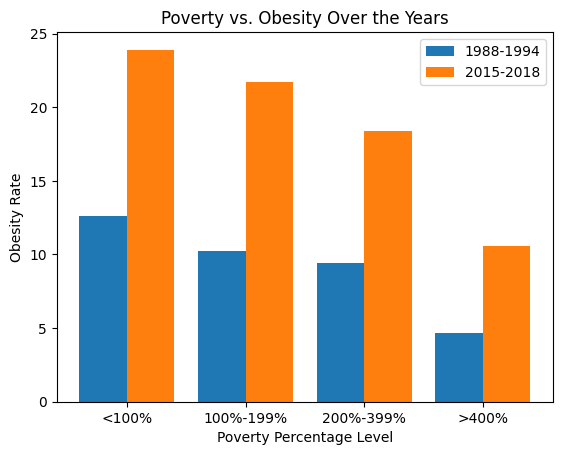

In [ ]:
# TWIN BAR GRAPH

# OBESITY RATES FROM 1988-1994
old_obesity_rates = [5.1, 5.2, 5.3, 5.4]
for i in range(4):
  temp = obesity_data.loc[obesity_data.YEAR_NUM == 1][obesity_data.STUB_LABEL_NUM == old_obesity_rates[i]][obesity_data.AGE_NUM == 0]
  old_obesity_rates[i] = float(temp.ESTIMATE)

# OBESITY RATES FROM 2015-2018
new_obesity_rates = [5.1, 5.2, 5.3, 5.4]
for i in range(4):
  temp = obesity_data.loc[obesity_data.YEAR_NUM == 10][obesity_data.STUB_LABEL_NUM == new_obesity_rates[i]][obesity_data.AGE_NUM == 0]
  new_obesity_rates[i] = float(temp.ESTIMATE)

# STYLING THE GRAPH
poverty_percentages = ['<100%', '100%-199%', '200%-399%', '>400%']
width = 0.4
values = np.arange(len(poverty_percentages))
plt.bar(values, old_obesity_rates, width, label = "1988-1994")
plt.bar(values + width, new_obesity_rates, width, label = "2015-2018")

plt.xlabel('Poverty Percentage Level')
plt.ylabel('Obesity Rate')
plt.title('Poverty vs. Obesity Over the Years')
plt.xticks(values + 0.2, poverty_percentages)
plt.legend()
plt.show()

<ipython-input-15-6b545d58c5c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_data = gender_data.loc[gender_data.STUB_LABEL_NUM == 1.1][gender_data.AGE_NUM == 0.0].drop(['STUB_LABEL_NUM','AGE_NUM'], axis = 'columns')
<ipython-input-15-6b545d58c5c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_data = gender_data.loc[gender_data.STUB_LABEL_NUM == 1.2][gender_data.AGE_NUM == 0.0].drop(['STUB_LABEL_NUM','AGE_NUM'], axis = 'columns')


Text(0.5, 0, 'Year Ranges')

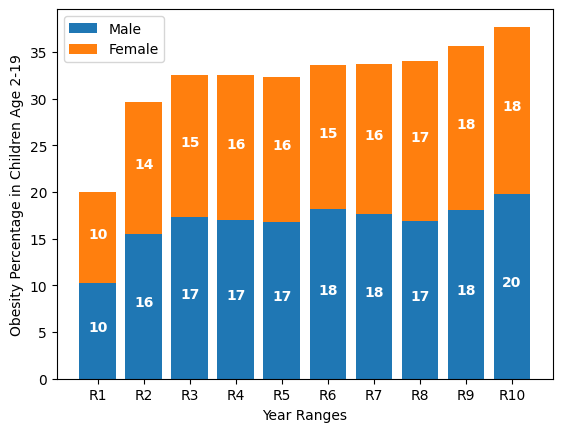

In [ ]:
male_data = gender_data.loc[gender_data.STUB_LABEL_NUM == 1.1][gender_data.AGE_NUM == 0.0].drop(['STUB_LABEL_NUM','AGE_NUM'], axis = 'columns')
female_data = gender_data.loc[gender_data.STUB_LABEL_NUM == 1.2][gender_data.AGE_NUM == 0.0].drop(['STUB_LABEL_NUM','AGE_NUM'], axis = 'columns')
# Data
groups = ['R1','R2','R3','R4','R5','R6','R7','R8','R9','R10']
values1 = male_data.ESTIMATE
values2 = female_data.ESTIMATE
width = 99999999999
fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(groups, values1, label = "Male")
ax.bar(groups, values2, bottom = values1, label = "Female")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

ax.legend()
ax.set_ylabel('Obesity Percentage in Children Age 2-19')
ax.set_xlabel('Year Ranges')



###Line Graph

<ipython-input-16-ea92b1f1331a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df.loc[df.YEAR_NUM == obesity_one[i]][df.STUB_LABEL_NUM == 5.1]
<ipython-input-16-ea92b1f1331a>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df.loc[df.YEAR_NUM == obesity_two[i]][df.STUB_LABEL_NUM == 5.2]
<ipython-input-16-ea92b1f1331a>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df.loc[df.YEAR_NUM == obesity_three[i]][df.STUB_LABEL_NUM == 5.3]
<ipython-input-16-ea92b1f1331a>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df.loc[df.YEAR_NUM == obesity_four[i]][df.STUB_LABEL_NUM == 5.4]


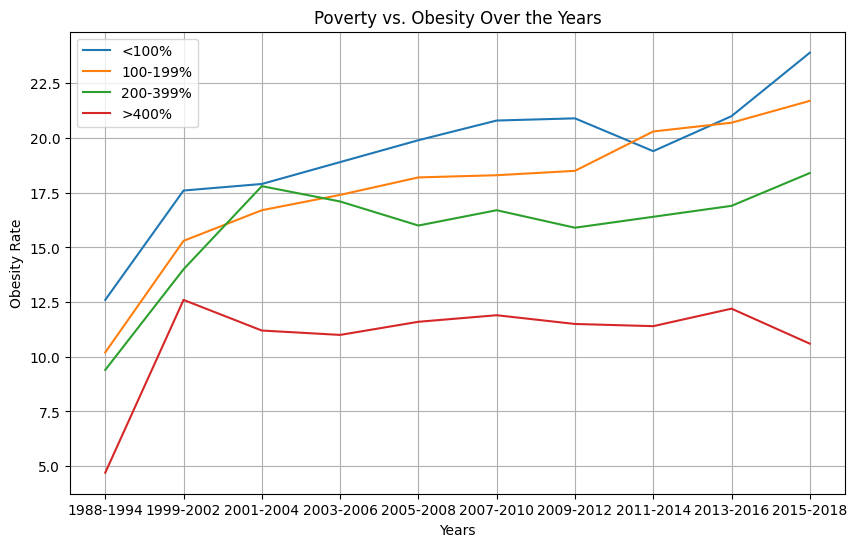

In [ ]:
#LINE GRAPH (Poverty vs. Obesity)

#Filtering data for line graph
df = obesity_data.loc[obesity_data.AGE_NUM == 0].drop(['STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL', 'YEAR', 'AGE'], axis = 'columns')

#Data for <100% poverty level
obesity_one = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
  temp = df.loc[df.YEAR_NUM == obesity_one[i]][df.STUB_LABEL_NUM == 5.1]
  obesity_one[i] = float(temp.ESTIMATE)

#Data for 100-199% poverty level
obesity_two = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
  temp = df.loc[df.YEAR_NUM == obesity_two[i]][df.STUB_LABEL_NUM == 5.2]
  obesity_two[i] = float(temp.ESTIMATE)

#Data for 200-399% poverty level
obesity_three = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
  temp = df.loc[df.YEAR_NUM == obesity_three[i]][df.STUB_LABEL_NUM == 5.3]
  obesity_three[i] = float(temp.ESTIMATE)

#Data for >400% poverty level
obesity_four = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
  temp = df.loc[df.YEAR_NUM == obesity_four[i]][df.STUB_LABEL_NUM == 5.4]
  obesity_four[i] = float(temp.ESTIMATE)

#Line graph organization
x  = ['1988-1994', '1999-2002', '2001-2004', '2003-2006', '2005-2008', '2007-2010', '2009-2012', '2011-2014', '2013-2016', '2015-2018']

plt.figure(figsize = (10, 6))
plt.plot(x, obesity_one, label="<100%")
plt.plot(x, obesity_two, label="100-199%")
plt.plot(x, obesity_three, label="200-399%")
plt.plot(x, obesity_four, label=">400%")
plt.grid()
plt.plot()

plt.xlabel("Years")
plt.ylabel("Obesity Rate")
plt.title("Poverty vs. Obesity Over the Years")
plt.legend()
plt.show()


<ipython-input-17-056f724fc0c4>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df.loc[df.YEAR_NUM == obesity_percent[i]][df.STUB_LABEL_NUM == 0]


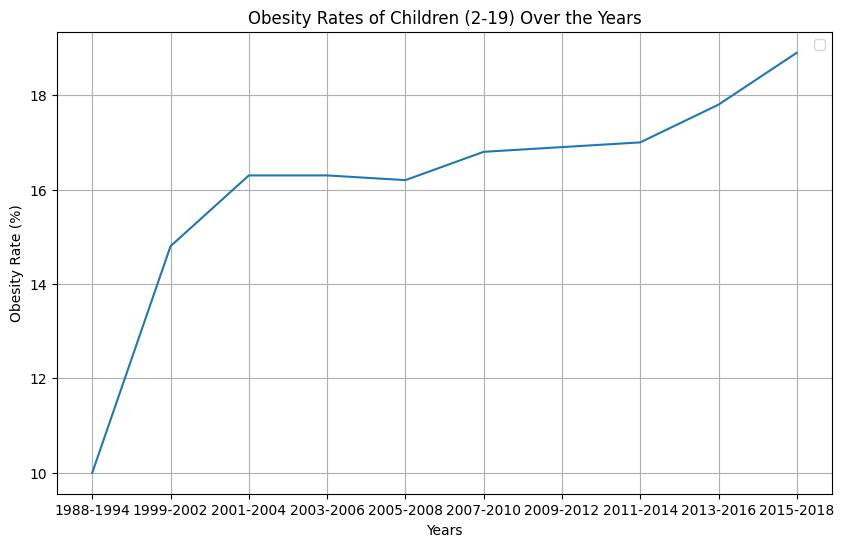

In [ ]:
#LINE GRAPH (Obesity Rate of Children Over the Years)

#Line graph size
plt.figure(figsize = (10, 6))

#Retrieving the data

df = obesity_data.loc[obesity_data.AGE_NUM == 0].drop(['STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL', 'YEAR', 'AGE'], axis = 'columns')
obesity_percent = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(10):
  temp = df.loc[df.YEAR_NUM == obesity_percent[i]][df.STUB_LABEL_NUM == 0]
  obesity_percent[i] = float(temp.ESTIMATE)

#Line graph organization
years = ['1988-1994', '1999-2002', '2001-2004', '2003-2006', '2005-2008', '2007-2010', '2009-2012', '2011-2014', '2013-2016', '2015-2018']

plt.plot(years, obesity_percent)

plt.xlabel('Years')
plt.ylabel('Obesity Rate (%)')
plt.rc('xtick', labelsize = 9)
plt.rc('ytick', labelsize = 10)
plt.title('Obesity Rates of Children (2-19) Over the Years')
plt.legend()
plt.grid()
plt.show()

###Area Plot

In [ ]:
final_origin_data = race_origin_data.loc[ race_origin_data['AGE_NUM'] == 0.0].drop(['AGE','STUB_NAME','STUB_NAME_NUM','STUB_LABEL'], axis = 'columns')

white_only = final_origin_data.loc[final_origin_data['STUB_LABEL_NUM'] == 3.11]
black_and_african = final_origin_data.loc[final_origin_data['STUB_LABEL_NUM'] == 3.12]
asian_only = final_origin_data.loc[final_origin_data['STUB_LABEL_NUM'] == 3.13]
hispanic_all = final_origin_data.loc[final_origin_data['STUB_LABEL_NUM'] == 3.21]
mexican_only = final_origin_data.loc[final_origin_data['STUB_LABEL_NUM'] == 3.22]


In [ ]:
x = race_origin_data.YEAR_NUM.unique()
y_black = black_and_african.ESTIMATE
y_asian = asian_only.ESTIMATE
y_white = white_only.ESTIMATE
y_hispanic_all = hispanic_all.ESTIMATE
y_mexican = mexican_only.ESTIMATE

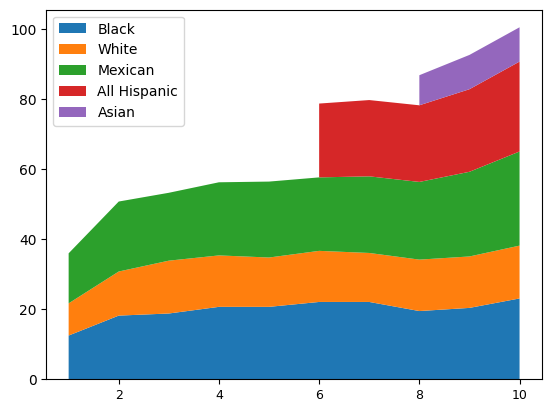

In [ ]:
# Area plot
plt.stackplot(x, y_black,  y_white, y_mexican, y_hispanic_all, y_asian,  labels = ['Black','White', 'Mexican','All Hispanic','Asian'])
plt.legend(loc = 'upper left')


# FINISHED MODEL

## Training and Testing Data
> **MAIN VIDEO**
> * https://www.youtube.com/watch?v=BsI2Smi27DQ

---

> * https://www.youtube.com/watch?v=V1KAJ1oAS7U
> * https://www.youtube.com/watch?v=BUkqYGPnLZ8


In [ ]:
# SPLITTING/CLEANING DATA
my_data = obesity_data.loc[obesity_data.AGE_NUM == 0][obesity_data.STUB_NAME_NUM == 5]
my_data = my_data.drop(['AGE_NUM','STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL', 'YEAR', 'AGE'], axis = 'columns')

#median_estimate = math.floor(my_data.ESTIMATE.median())
#my_data = my_data.fillna(median_estimate)

print(my_data)

     STUB_LABEL_NUM  YEAR_NUM  ESTIMATE
171             5.1         1      12.6
172             5.1         2      17.6
173             5.1         3      17.9
174             5.1         4      18.9
175             5.1         5      19.9
176             5.1         6      20.8
177             5.1         7      20.9
178             5.1         8      19.4
179             5.1         9      21.0
180             5.1        10      23.9
181             5.2         1      10.2
182             5.2         2      15.3
183             5.2         3      16.7
184             5.2         4      17.4
185             5.2         5      18.2
186             5.2         6      18.3
187             5.2         7      18.5
188             5.2         8      20.3
189             5.2         9      20.7
190             5.2        10      21.7
191             5.3         1       9.4
192             5.3         2      14.0
193             5.3         3      17.8
194             5.3         4      17.1


<ipython-input-59-4bc462fcc2ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  my_data = obesity_data.loc[obesity_data.AGE_NUM == 0][obesity_data.STUB_NAME_NUM == 5]


In [ ]:
predictors = ['STUB_LABEL_NUM', 'YEAR_NUM']
x = my_data[predictors]
y = my_data['ESTIMATE']

In [ ]:
# SPLITTING THE DATASET -->
#     use 50% of the dataframe to train the machine and create a model
#     use 40% of data the machine has never seen before to validate the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40,  random_state = 1)

# EXPLORING THE TRAIN AND TEST DATASETS
print("x_train shape: ", x_train.shape)
print("x_train mean: ", np.mean(x_train), "\n")

print("x_test shape: ", x_test.shape)
print("x_test mean: ", np.mean(x_test), "\n")

print("y_train shape: ", y_train.shape)
print("y_train mean: ", np.mean(y_test), "\n")

x_train shape:  (24, 2)
x_train mean:  STUB_LABEL_NUM    5.216667
YEAR_NUM          5.375000
dtype: float64 

x_test shape:  (16, 2)
x_test mean:  STUB_LABEL_NUM    5.3000
YEAR_NUM          5.6875
dtype: float64 

y_train shape:  (24,)
y_train mean:  14.9875 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Linear Regression (ALL AGES)
> * https://www.youtube.com/watch?v=A6jKo7OjAKw
> * https://www.youtube.com/watch?v=wH_ezgftiy0

In [ ]:
# CREATING AND TRAINING THE MODEL
lr = LinearRegression()
model1 = lr.fit(x_train, y_train)
model1.intercept_   # Y-INTERCEPT
model1.coef_        # SLOPE

array([-25.96233413,   0.79215198])

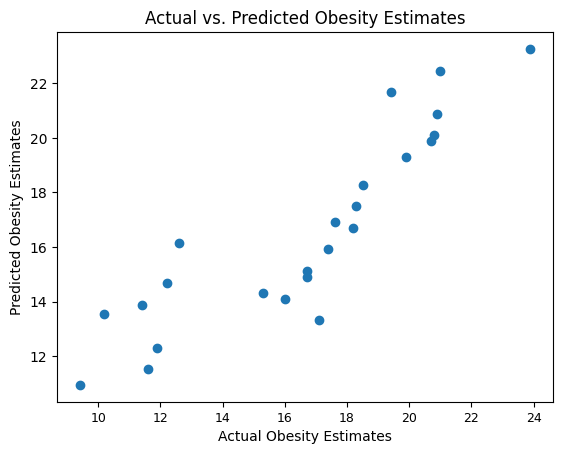

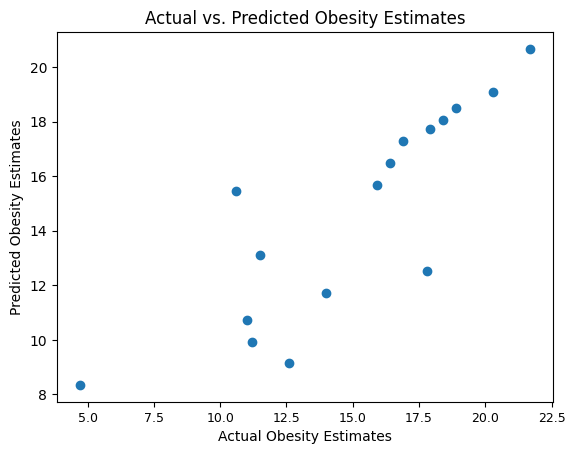

Train Prediction Accuracy:  0.7832127497787615
Test Prediction Accuracy:  0.6997019443206081


In [ ]:
# ACTUAL OBESITY ESTIMATES VS. PREDICTED OBESITY ESTIMATES (Y_TRAIN VS Y_PREDICT_TRAIN)
# USE X_TRAIN DATA TO PREDICT THE Y_TRAIN VALUES
y_predict_train = lr.predict(x_train)

plt.scatter(y_train, y_predict_train)
plt.xlabel("Actual Obesity Estimates")
plt.ylabel("Predicted Obesity Estimates")
plt.title("Actual vs. Predicted Obesity Estimates")
plt.show()

rscore1 = r2_score(y_train, y_predict_train)

# ACTUAL OBESITY ESTIMATES VS. PREDICTED OBESITY ESTIMATES (Y_TEST VS Y_PREDICT_TEST)
# USE X_TEST DATA TO PREDICT THE Y_TEST VALUES
y_predict_test = lr.predict(x_test)

plt.scatter(y_test, y_predict_test)
plt.xlabel("Actual Obesity Estimates")
plt.ylabel("Predicted Obesity Estimates")
plt.title("Actual vs. Predicted Obesity Estimates")
plt.show()

rscore2 = r2_score(y_test, y_predict_test)

print('Train Prediction Accuracy: ', rscore1)   # MORE ACCURATE
print('Test Prediction Accuracy: ', rscore2)

## R-Squared, MSE, ME

In [ ]:
# ANALYZING THE MODEL
ME = mean_absolute_error(y_test, y_predict_test)
print('Mean Absolute Error: ', ME)

MSE = mean_squared_error(y_test, y_predict_test, squared=False)
print('Mean Squared Error: ', MSE)

MSE = mean_squared_error(y_test, y_predict_test, squared=True)
print('Mean Squared Error (Squared): ', MSE)

RSQ = lr.score(x_test, y_test)
print('R-Squared: ', RSQ)

Mean Absolute Error:  1.6556547724927964
Mean Squared Error:  2.3620946113464423
Mean Squared Error (Squared):  5.5794909529519
R-Squared:  0.6997019443206081


## Future Years Prediction

In [ ]:
x_new = x_train

# GENERATE FUTURE YEARS
count = 0
for i in x_new.YEAR_NUM:
  x_new.YEAR_NUM.values[count] = i + 10
  count = count + 1
print(x_new)

# 1 = '1988-1994'
# 2 = '1999-2002'
# 3 = '2001-2004'
# 4 = '2003-2006'
# 5 = '2005-2008'
# 6 = '2007-2010'
# 7 = '2009-2012'
# 8 = '2011-2014'
# 9 = '2013-2016'
# 10 = '2015-2018'
# 11 = '2017-2020'
# 12 = '2019-2022'
# 13 = '2021-2024'
# 14 = '2023-2026'
# 15 = '2025-2028'
# 16 = '2027-2030'
# 17 = '2029-2032'
# 18 = '2031-2034'
# 19 = '2033-2036'
# 20 = '2035-2038'

     STUB_LABEL_NUM  YEAR_NUM
175             5.1        15
185             5.2        15
181             5.2        11
206             5.4        16
194             5.3        14
195             5.3        15
205             5.4        15
191             5.3        11
189             5.2        19
196             5.3        16
177             5.1        17
184             5.2        14
178             5.1        18
209             5.4        19
172             5.1        12
187             5.2        17
171             5.1        11
186             5.2        16
176             5.1        16
182             5.2        12
180             5.1        20
179             5.1        19
183             5.2        13
208             5.4        18


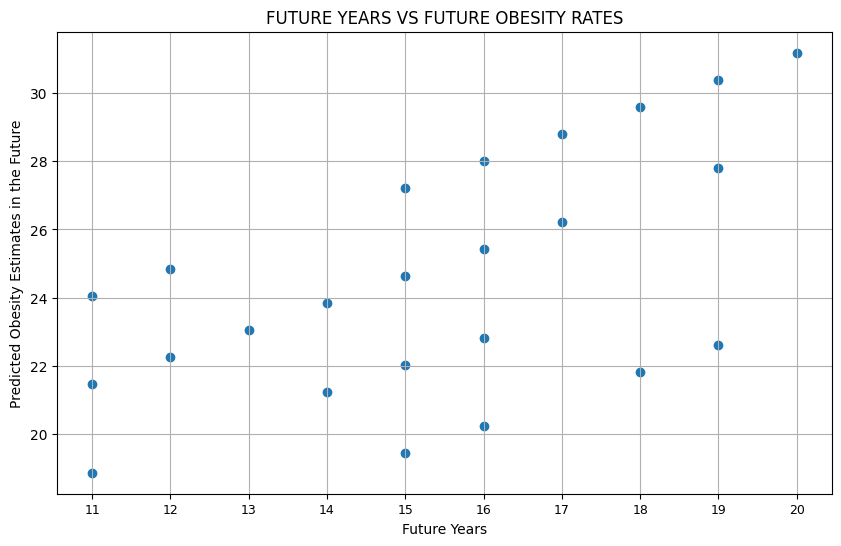

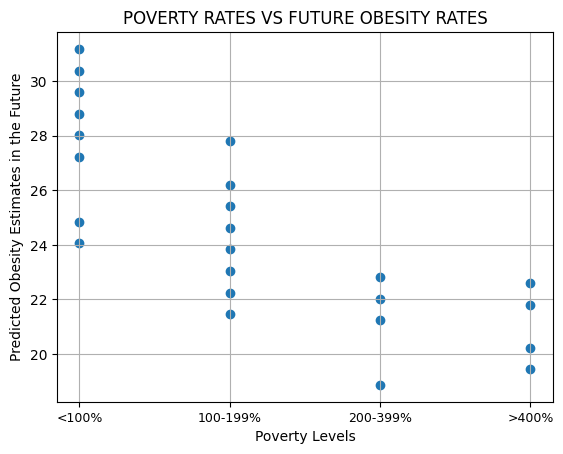

In [ ]:
# USE FUTURE YEARS (X_NEW) TO PREDICT FUTURE OBESITY RATES
y_predict_new = lr.predict(x_new)

def major_x_formatter(x, pos):
    if pos is not None:
        return f"{x_labels_list[pos]}"
    x_r = int(round(x))
    if x_r in x_labels:
        return f"{x:.0f}:{x_labels[x_r]}"
    else:
        return f"{x:.2f}"

# PLOT FUTURE YEARS VS FUTURE OBESITY RATES
plt.figure(figsize = (10, 6))

plt.scatter(x_new.YEAR_NUM, y_predict_new)
plt.xlabel("Future Years")
plt.ylabel("Predicted Obesity Estimates in the Future")
plt.title("FUTURE YEARS VS FUTURE OBESITY RATES")

x_labels1 = {11 : "2017-2020", 12 : "2019-2022", 13: "2021-2024" , 14: "2023-2026", 15: "2025-2028", 16 : "2027-2030", 17 : "2029-2032", 18: "2031-2034" , 19: "2033-2036", 20: "2035-2038"}
x_labels_list1 = list(x_labels1.values())
plt.xticks(list(x_labels1.keys()))
#plt.gca().xaxis.set_major_formatter(major_x_formatter)

plt.grid()
plt.show()

# PLOT POVERTY RATES VS FUTURE OBESITY RATES

plt.scatter(x_new.STUB_LABEL_NUM, y_predict_new)
plt.xlabel("Poverty Levels")
plt.ylabel("Predicted Obesity Estimates in the Future")
plt.title("POVERTY RATES VS FUTURE OBESITY RATES")

x_labels = { 5.1 : "<100%", 5.2 : "100-199%", 5.3: "200-399%" , 5.4: ">400%" }
x_labels_list = list(x_labels.values())
plt.xticks(list(x_labels.keys()))
plt.gca().xaxis.set_major_formatter(major_x_formatter)

plt.grid()
plt.show()
